In [1]:
#install kaggle
!pip install -q kaggle

In [2]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neshatsharbatdar","key":"cdcb724417f2e3f9a9219a4b9309c52f"}'}

In [3]:
#create a kaggle folder
! mkdir ~/.kaggle

In [4]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/ 

In [5]:
# Permision for the json to act
! chmod 600 ~/.kaggle/kaggle.json 

In [6]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-21 20:52:33          14272  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8563  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3830  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3209  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [7]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 38.5MB/s]


In [8]:
!unzip new-york-city-airbnb-open-data.zip

Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# **Load The Data**

In [10]:
data = pd.read_csv('/content/AB_NYC_2019.csv')

# **Data Cleansing**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
(data['last_review'].isnull()==data['reviews_per_month'].isnull()).all()

True

In [14]:
data.loc[data['reviews_per_month'].isnull(),'reviews_per_month']=0

In [15]:
data.drop(['id','name','host_name','last_review'], axis=1, inplace=True)
print(data.head())

   host_id  ... availability_365
0     2787  ...              365
1     2845  ...              355
2     4632  ...              365
3     4869  ...              194
4     7192  ...                0

[5 rows x 12 columns]


In [16]:
print(data.isnull().any())

host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


In [17]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [18]:
print(data.shape)
data_filtered = data[data['price'] > 0]
data_filtered2 = data_filtered[data_filtered['minimum_nights'] <= 365]
print(data_filtered2.shape)


(48895, 12)
(48870, 12)


In [19]:
#host_counter = []
#host_counter.append(data_filtered2['host_id'][0])
#for i in data_filtered2['host_id']:
#  for j in host_counter:
#    if i != j:
#      host_counter.append(i)  
#print(host_counter.length())  

In [20]:
data_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48870 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48870 non-null  int64  
 1   neighbourhood_group             48870 non-null  object 
 2   neighbourhood                   48870 non-null  object 
 3   latitude                        48870 non-null  float64
 4   longitude                       48870 non-null  float64
 5   room_type                       48870 non-null  object 
 6   price                           48870 non-null  int64  
 7   minimum_nights                  48870 non-null  int64  
 8   number_of_reviews               48870 non-null  int64  
 9   reviews_per_month               48870 non-null  float64
 10  calculated_host_listings_count  48870 non-null  int64  
 11  availability_365                48870 non-null  int64  
dtypes: float64(3), int64(6), object(

# **Exploration Data and Visualizing**

In [21]:
print(data_filtered2['host_id'].value_counts())

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37442, dtype: int64


In [22]:
grouped = data_filtered2.groupby(data_filtered2.host_id)
df_new = grouped.get_group(219517861)
df_new

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38293,219517861,Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,327,309
38294,219517861,Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
38588,219517861,Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.60,327,159
39769,219517861,Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,1.86,327,91
39770,219517861,Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...
47691,219517861,Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,0.00,327,339
47692,219517861,Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,0.00,327,342
47693,219517861,Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,0.00,327,347
47814,219517861,Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,0.00,327,327


In [23]:
print(df_new['neighbourhood_group'].value_counts())

Manhattan    327
Name: neighbourhood_group, dtype: int64


In [24]:
df_new['price'].describe()

count    327.000000
mean     253.195719
std      119.586884
min      100.000000
25%      188.500000
50%      228.000000
75%      255.000000
max      699.000000
Name: price, dtype: float64

In [25]:
data_filtered2['price'].describe()

count    48870.000000
mean       152.759402
std        240.199363
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [48]:
Q1 = data_filtered2['price'].quantile(0.25)
Q3 = data_filtered2['price'].quantile(0.75)
IQR=Q3-Q1
data_filtered3 = data_filtered2[~((data_filtered2['price']<(Q1-1.5*IQR))|(data_filtered2['price']>(Q3+1.5-IQR)))]

In [51]:
data_filtered3['price'].describe()

count    13527.000000
mean        52.392992
std         12.062025
min         10.000000
25%         45.000000
50%         52.000000
75%         62.000000
max         70.000000
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


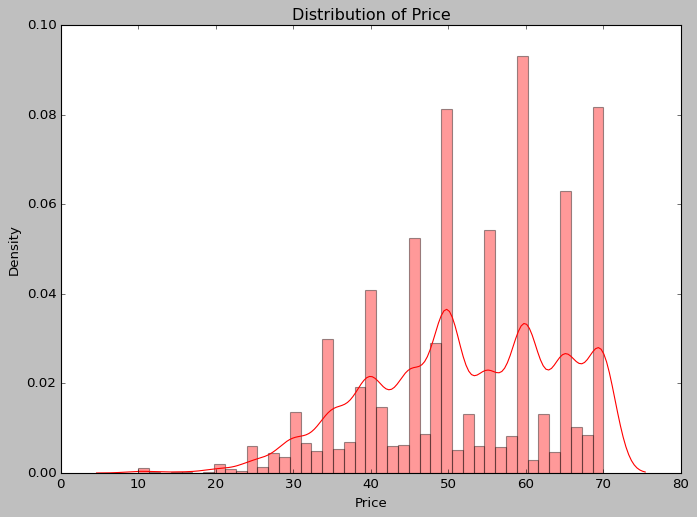

In [52]:
plt.figure(figsize=(10,7))
sns.distplot(data_filtered3.price,color='r')
plt.xlabel("Price")
plt.title("Distribution of Price")
plt.show()

In [53]:
import scipy.stats as st
st.shapiro(data_filtered3.price)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.961851954460144, 0.0)

In [26]:
data_filtered2.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,87.577064,106.725371,10.0,45.0,65.0,99.0,2500.0
Brooklyn,20089.0,124.452238,186.922112,10.0,60.0,90.0,150.0,10000.0
Manhattan,21654.0,196.888011,291.421157,10.0,95.0,150.0,220.0,10000.0
Queens,5664.0,99.493997,167.125802,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [27]:
set(data_filtered2['neighbourhood_group'])

{'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'}

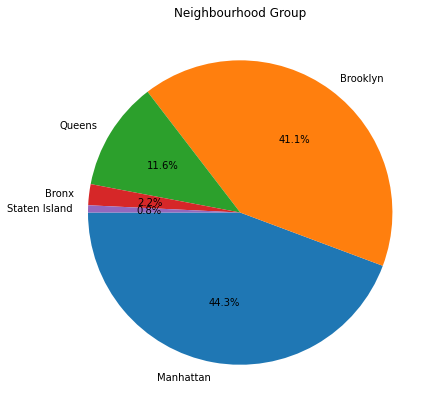

In [28]:
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(data_filtered2.neighbourhood_group.value_counts(), labels=data_filtered2.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

In [29]:
pip install folium pandas

In [30]:
import folium
import folium.plugins as plugins
ny_map = folium.Map(location=[40.7, -74],zoom_start =10)
data_loc= data_filtered2[['latitude','longitude']].values
data_loc =data_loc.tolist()
hm = plugins.HeatMap(data_loc)
hm.add_to(ny_map)
ny_map

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


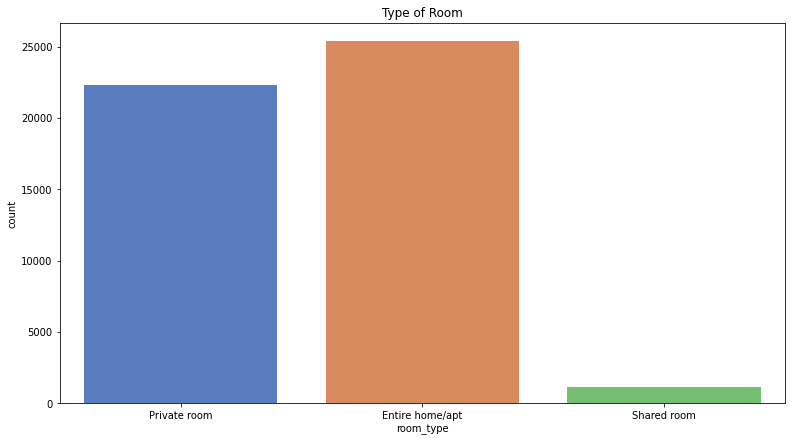

In [31]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(data_filtered2.room_type, palette="muted")
fig = plt.gcf()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


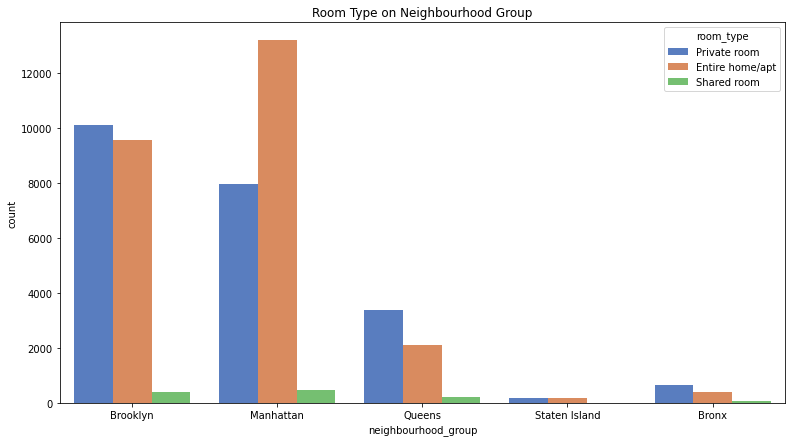

In [32]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(data_filtered2.neighbourhood_group,hue=data_filtered2.room_type, palette="muted")
plt.show()

In [33]:
data_filtered2.groupby('neighbourhood_group')['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,4.563303,15.638775,1.0,1.0,2.0,3.0,365.0
Brooklyn,20089.0,5.894569,14.533385,1.0,2.0,3.0,5.0,365.0
Manhattan,21654.0,8.345617,18.824170,1.0,1.0,3.0,6.0,365.0
Queens,5664.0,5.010240,11.952636,1.0,1.0,2.0,3.0,365.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


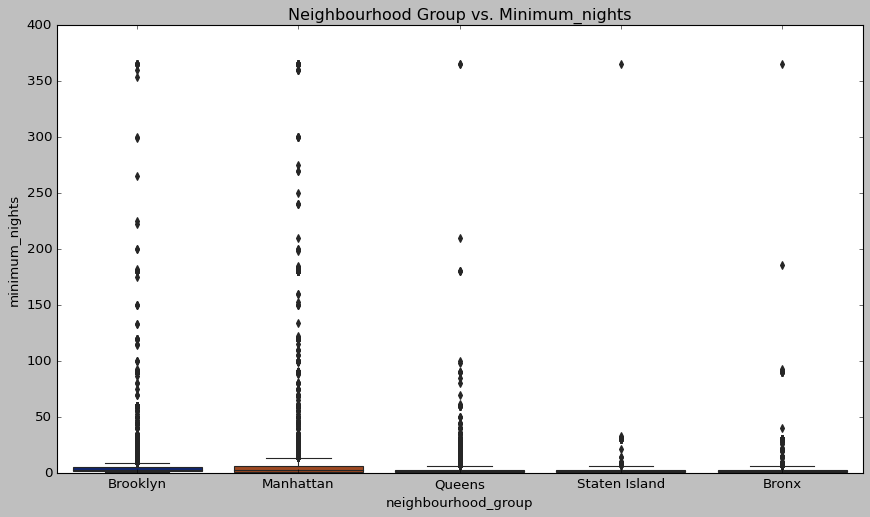

In [34]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Minimum_nights")
sns.boxplot(data=data_filtered2, x='neighbourhood_group', y='minimum_nights',palette="dark")
plt.show()

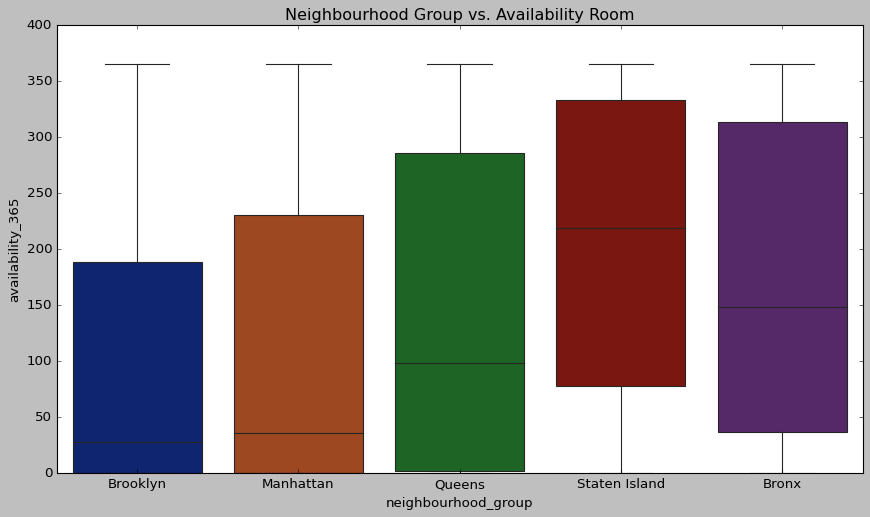

In [35]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=data_filtered2, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

In [36]:
data_filtered2.groupby('neighbourhood_group')['availability_365'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,165.794495,135.304079,0.0,37.0,148.0,313.75,365.0
Brooklyn,20089.0,100.159739,126.243695,0.0,0.0,28.0,188.00,365.0
Manhattan,21654.0,111.929667,132.641048,0.0,0.0,36.0,230.00,365.0
Queens,5664.0,144.422493,135.528910,0.0,2.0,98.0,286.00,365.0
Staten Island,373.0,199.678284,131.852000,0.0,78.0,219.0,333.00,365.0


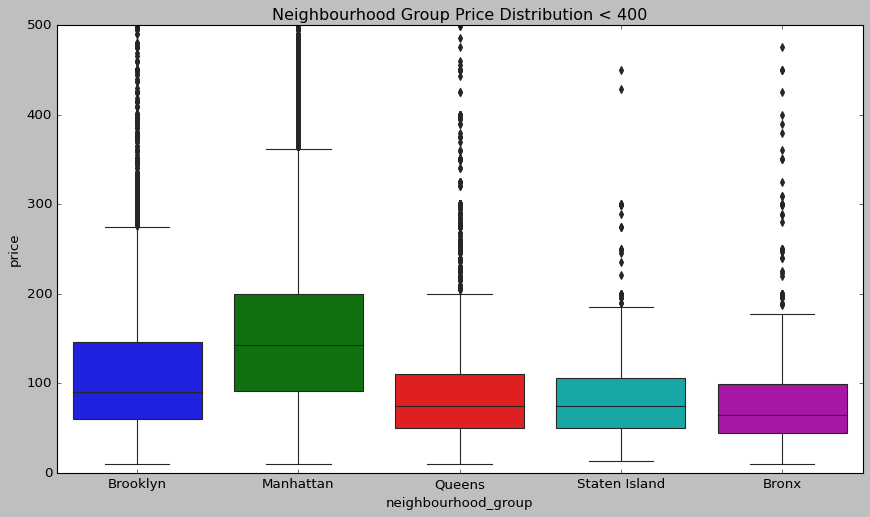

In [37]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 400")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = data_filtered2[data_filtered2.price<500])
plt.show()

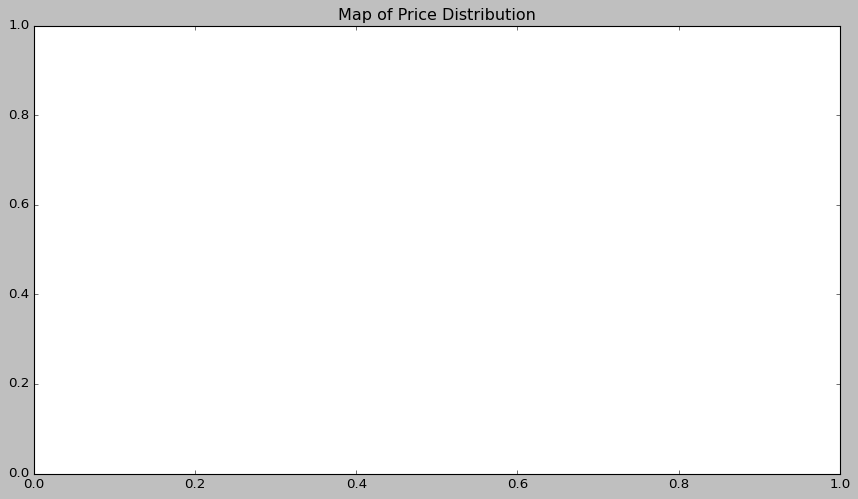

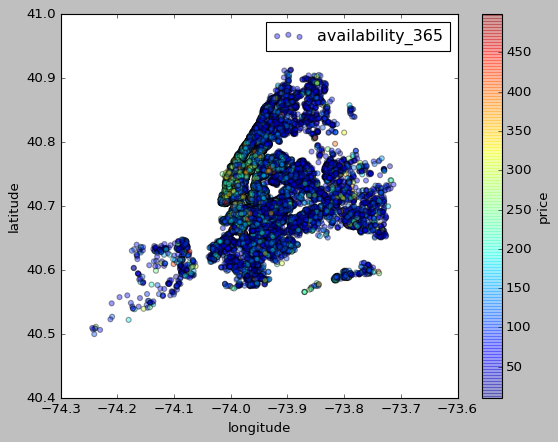

In [38]:
plt.figure(figsize=(13,7))
plt.title("Map of Price Distribution")
ax=data_filtered2[data_filtered2.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

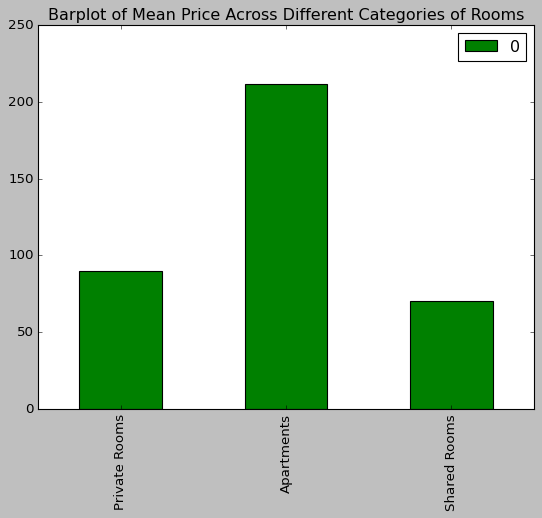

In [56]:
pvt = data_filtered2[data_filtered2['room_type'] == 'Private room']
share = data_filtered2[data_filtered2['room_type'] == 'Shared room']
apt = data_filtered2[data_filtered2['room_type'] == 'Entire home/apt']

ind = ['Private Rooms','Apartments','Shared Rooms']
x = pd.DataFrame([pvt.price.mean(),apt.price.mean(),share.price.mean()], index=ind)

x.plot.bar(color='g')
plt.title("Barplot of Mean Price Across Different Categories of Rooms")
plt.show()


In [39]:
from scipy.stats import f_oneway
f_oneway(*[data_filtered2.price[data_filtered2.neighbourhood_group == i]
for i in data_filtered2.neighbourhood_group.unique()])

F_onewayResult(statistic=354.45890604820926, pvalue=2.1966403577222368e-301)

In [40]:
from scipy import stats
df_busyiest = data_filtered2[data_filtered2['availability_365'] == 0]
stats.ttest_ind(df_busyiest.price, data_filtered2.price)

Ttest_indResult(statistic=-8.146519977278201, pvalue=3.809947270218795e-16)

In [41]:
from scipy import stats
df_busyiest2 = data_filtered2[data_filtered2['availability_365'] < 50]
stats.ttest_ind(df_busyiest.price, data_filtered2.price)

Ttest_indResult(statistic=-8.146519977278201, pvalue=3.809947270218795e-16)

In [42]:
data_filtered2.price.describe()

count    48870.000000
mean       152.759402
std        240.199363
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [43]:
df_busyiest.price.describe()

count    17530.000000
mean       136.055391
std        211.238670
min         10.000000
25%         65.000000
50%        100.000000
75%        158.000000
max      10000.000000
Name: price, dtype: float64

In [44]:
df_busyiest2.price.describe()

count    24833.000000
mean       136.875367
std        193.394830
min         10.000000
25%         67.000000
50%        100.000000
75%        160.000000
max      10000.000000
Name: price, dtype: float64

In [45]:
stats.ttest_ind(df_busyiest.sample(500).calculated_host_listings_count, data_filtered2.sample(1000).calculated_host_listings_count)

Ttest_indResult(statistic=-3.679957929855611, pvalue=0.00024153778933108975)

In [46]:
stats.ttest_ind(df_busyiest.sample(500).minimum_nights, data_filtered2.sample(1000).minimum_nights)

Ttest_indResult(statistic=-1.4313402236776793, pvalue=0.15254131803122184)

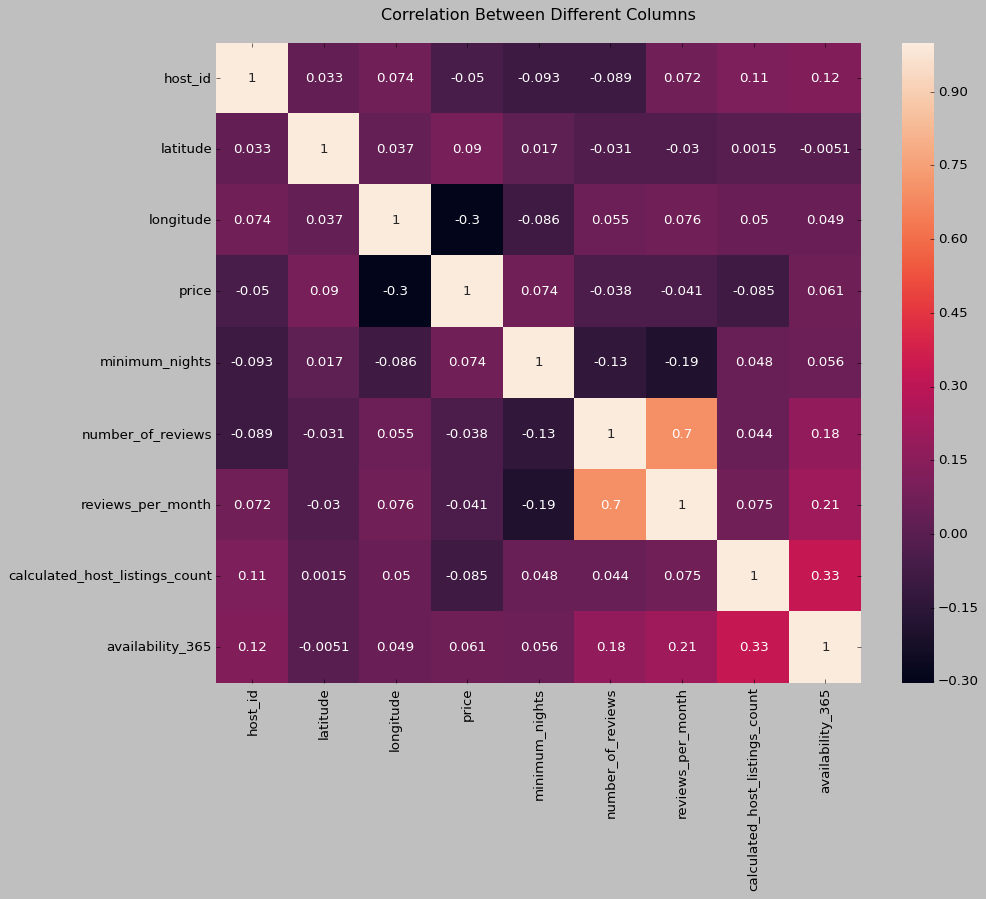

In [47]:
correlation = data_filtered2.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Columns\n")
sns.heatmap(correlation, annot=True)
plt.show()